In [ ]:
!pip install transformers -q
!pip install -q datasets

!gdown 1tMflGHMM5AcKnpcpt_6JdTGQcAaOzMYF
!unzip /content/nlp_test_task_2023.zip

In [81]:
import json

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from datasets import load_dataset
from transformers import AutoTokenizer

In [4]:
PATH = '/content/nlp_test_task_2023/dataset'

with open(PATH + '/train.json', 'r') as f:
    train = json.load(f)

with open(PATH + '/test.json', 'r') as f:
    test = json.load(f)

In [5]:
train[0]

{'id': 809436509,
 'text': 'Извещение о проведении открытого конкурса в электронной форме для закупки №0328300032822000806 Общая информация Номер извещения 0328300032822000806 Наименование объекта закупки Поставка продуктов питания Способ определения поставщика (подрядчика, исполнителя) Открытый конкурс в бль Порядок внесения денежных средств в качестве обеспечения заявки на участие в закупке, а также условия гарантии Обеспечение заявки на участие в закупке может предоставляться участником закупки в виде денежных средств или независимой гарантии, предусмотренной ст. 45 Федерального закона № 44-ФЗ. Выбор способа обеспечения осуществляется участником закупки самостоятельно. Срок действия независимой гарантии должен составлять не менее месяца с даты окончания срока подачи заявок. Обеспечение заявки на участие в закупке предоставляется в соответствии с ч. 5 ст. 44 Федерального закона № 44-ФЗ. Условия независимой гарантии в соответствии со ст. 45 Федерального закона № 44-ФЗ. Реквизиты счета

Преобразуем данные в формат pd.DataFrame, для удобства дальнейшего анализа

In [6]:
def json2df(json : list):
    """Функция, которая преобразует данные из list в pd.DataFrame """
    id = []
    text = []
    label = []
    extracted_text = []
    answer_start = []
    answer_end = []

    for sample in json:
        id.append(sample['id'])
        text.append(sample['text'])
        label.append(sample['label'])
        if 'extracted_part' in sample:
            extracted_text.append(sample['extracted_part']['text'])
            answer_start.append(sample['extracted_part']['answer_start'])
            answer_end.append(sample['extracted_part']['answer_end'])
    
    if len(extracted_text) != 0:
        df = {'id' : id, 'text': text, 'label' : label, 'extracted_text' : extracted_text, 'answer_start' : answer_start, 'answer_end' : answer_end}
    else:
        df = {'id' : id, 'text': text, 'label' : label}
    
    return pd.DataFrame(data=df)

In [7]:
train = json2df(train)
test = json2df(test)

In [8]:
train

,id,text,label,extracted_text,answer_start,answer_end
0,809436509,Извещение о проведении открытого конкурса в эл...,обеспечение исполнения контракта,[Размер обеспечения исполнения контракта 6593....,[1279],[1343]
1,854885310,ТРЕБОВАНИЯ К СОДЕРЖАНИЮ ЗАЯВКИ участника запро...,обеспечение исполнения контракта,[Поставщик должен предоставить обеспечение исп...,[1222],[1318]
2,4382157,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,[Размер обеспечения исполнения контракта 10.00%],[1297],[1343]
3,184555082,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,[Размер обеспечения исполнения контракта 10.00%],[1304],[1350]
4,211645258,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,[Размер обеспечения исполнения контракта 10.00%],[1302],[1348]
...,...,...,...,...,...,...
1794,938335285,"«УТВЕРЖДАЮ» Директор МУП ""ПКП и ОРТ"" _________...",обеспечение гарантийных обязательств,[Заказчиком установлено требование обеспечения...,[1213],[1402]
1795,214609521,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯ...,обеспечение гарантийных обязательств,[],[0],[0]
1796,94811748,ДОГОВОР ПОДРЯДА № _____ «___»___________20____...,обеспечение гарантийных обязательств,[],[0],[0]
1797,903507299,ДОКУМЕНТАЦИЯ О ЗАКУПКЕ ЗАПРОС ПРЕДЛОЖЕНИЙ В ЭЛ...,обеспечение гарантийных обязательств,[],[0],[0]


In [9]:
print('Размер train:', train.shape[0])
print('Размер test:', test.shape[0])

Размер train: 1799
Размер test: 318


In [10]:
print('Уникальные значения label:')
for label in train['label'].unique():
    print(label)

Уникальные значения label:
обеспечение исполнения контракта
обеспечение гарантийных обязательств


In [11]:
print('Train')
for label in train['label'].unique():
    print(f'Кол-во примеров, имеющих label={label} ->', train[train['label'] == label].shape[0])
print('Test')
for label in test['label'].unique():
    print(f'Кол-во примеров, имеющих label={label} ->', test[test['label'] == label].shape[0])

Train
Кол-во примеров, имеющих label=обеспечение исполнения контракта -> 988
Кол-во примеров, имеющих label=обеспечение гарантийных обязательств -> 811
Test
Кол-во примеров, имеющих label=обеспечение исполнения контракта -> 175
Кол-во примеров, имеющих label=обеспечение гарантийных обязательств -> 143


Дисбаланс классов минимальный, методами сэмплинга можно пренебречь.

Заметим, что данные из extracted_part хранятся в массивах. Уберем массивы из таблицы. Перед этим убедимся, что в каждом массиве хранится только одно значение.

In [12]:
if len(train['extracted_text'].apply(len).unique()) == 1:
    print('Все тексты имеют единственный ответ.')
else:
    print('Не все тексты имеют единственный ответ.')


if len(train['answer_start'].apply(len).unique()) == 1:
    print('Все тексты имеют единственное начало.')
else:
    print('Не все тексты имеют единственное начало.')


if len(train['answer_end'].apply(len).unique()) == 1:
    print('Все тексты имеют единственный конец.')
else:
    print('Не все тексты имеют единственный конец.')

Все тексты имеют единственный ответ.
Все тексты имеют единственное начало.
Все тексты имеют единственный конец.


In [13]:
# вытаскиваем данные из массивов
train['extracted_text'] = train['extracted_text'].apply(lambda x: x[0] if len(x)>0 else '')
train['answer_start'] = train['answer_start'].apply(lambda x: x[0] if len(x)>0 else 0)
train['answer_end'] = train['answer_end'].apply(lambda x: x[0] if len(x)>0 else 0)

In [14]:
print('Отсутствует ответ на запрос')
for label in train['label'].unique():
    print(f'Запрос: {label} ->', train[(train['extracted_text'] == '') & (train['label'] == label)].shape[0])

Отсутствует ответ на запрос
Запрос: обеспечение исполнения контракта -> 4
Запрос: обеспечение гарантийных обязательств -> 303


Видим, что на второй запрос часто нет ответа, к тому же примеров для второго запроса и так почти на 200 меньше, поэтому возможно стоит воспользоваться методами сэмлинга, а также стратифицировать разбиение на train и test.

Посмотрим на кол-во токенов

In [60]:
tokenizer = AutoTokenizer.from_pretrained("AndrewChar/model-QA-5-epoch-RU")

train['tokenized_text'] = train['text'].apply(tokenizer.tokenize)
train['tokenized_extracted_text'] = train['extracted_text'].apply(tokenizer.tokenize)

Token indices sequence length is longer than the specified maximum sequence length for this model (729 > 512). Running this sequence through the model will result in indexing errors


In [86]:
print("Токенизированный текст: ", train['tokenized_text'].iloc[0][:15])
print("Токенизированный ответ: ", train['tokenized_extracted_text'].iloc[0][:15])

Токенизированный текст:  ['Из', '##ве', '##щение', 'о', 'про', '##ведени', '##и', 'открыт', '##ого', 'конкурса', 'в', 'электрон', '##ной', 'форме', 'для']
Токенизированный ответ:  ['Р', '##аз', '##мер', 'обеспечения', 'исп', '##олнения', 'контракт', '##а', '659', '##3', '.', '25', 'Р', '##ос', '##сийский']


Видим, что токенайзер плохо разделяет слова, поэтому имеет смысл обучить его

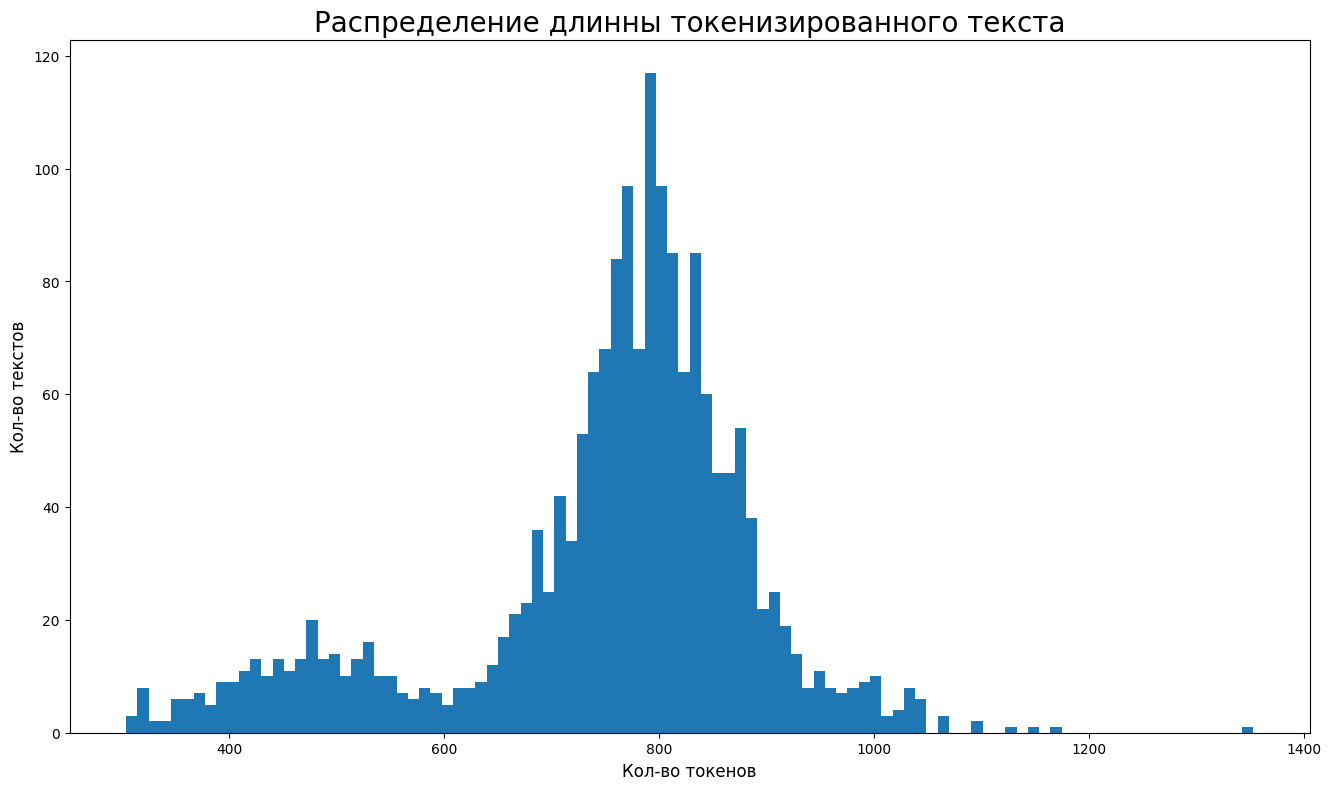

In [73]:
counts, bins = np.histogram(train['tokenized_text'].apply(len), bins=100)
plt.figure(figsize=(16,9))
plt.stairs(counts, bins, fill=True)
plt.title('Распределение длинны токенизированного текста', fontsize=20)
plt.xlabel('Кол-во токенов', fontsize=12)
plt.ylabel('Кол-во текстов', fontsize=12)
plt.show()

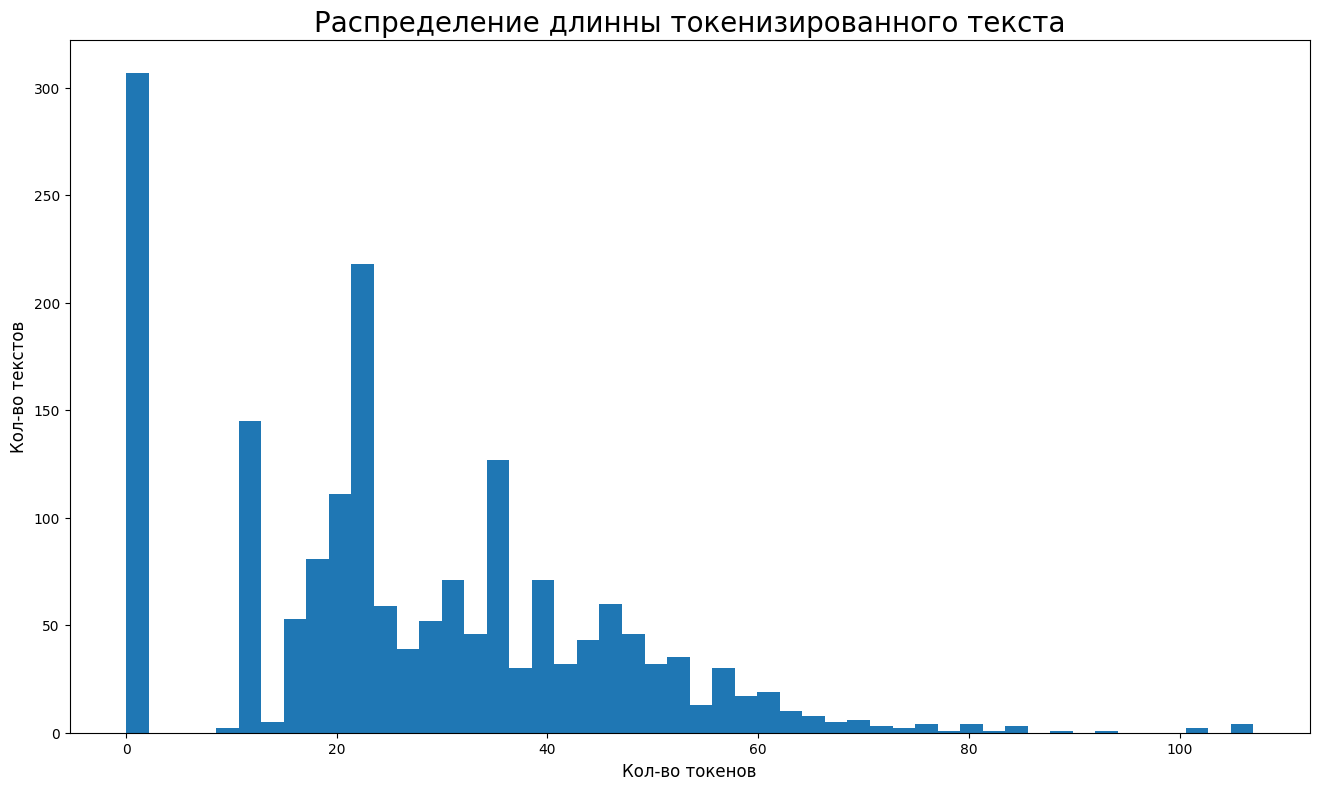

In [77]:
counts, bins = np.histogram(train['tokenized_extracted_text'].apply(len), bins=50)
plt.figure(figsize=(16,9))
plt.stairs(counts, bins, fill=True)
plt.title('Распределение длинны токенизированного текста', fontsize=20)
plt.xlabel('Кол-во токенов', fontsize=12)
plt.ylabel('Кол-во текстов', fontsize=12)
plt.show()

Обучим токенайзер

In [ ]:
PATH = '/content/nlp_test_task_2023/dataset'
raw_dataset = load_dataset('json', data_files=PATH + '/train.json')

In [83]:
def get_training_corpus():
    dataset = raw_dataset["train"]
    for start_idx in range(0, len(dataset), 1000):
        samples = dataset[start_idx : start_idx + 1000]
        yield samples["text"]

training_corpus = get_training_corpus()
old_tokenizer = AutoTokenizer.from_pretrained("AndrewChar/model-QA-5-epoch-RU")
tokenizer = old_tokenizer.train_new_from_iterator(training_corpus, 52000)

In [87]:
train['trained_tokenizer_text'] = train['text'].apply(tokenizer.tokenize)
train['trained_tokenizer_extracted_text'] = train['extracted_text'].apply(tokenizer.tokenize)

Token indices sequence length is longer than the specified maximum sequence length for this model (555 > 512). Running this sequence through the model will result in indexing errors


In [91]:
print('Базовый токенайзер:', train['tokenized_text'].iloc[0][:15])
print('Обученный токенайзер:', train['trained_tokenizer_text'].iloc[0][:15])

Базовый токенайзер: ['Из', '##ве', '##щение', 'о', 'про', '##ведени', '##и', 'открыт', '##ого', 'конкурса', 'в', 'электрон', '##ной', 'форме', 'для']
Обученный токенайзер: ['Извещение', 'о', 'проведении', 'открытого', 'конкурса', 'в', 'электронной', 'форме', 'для', 'закупки', '№0328300032822000806', 'Общая', 'информация', 'Номер', 'извещения']


Стало намного лучше

Также убедимся, что длинна токенизированного текста уменьшилась

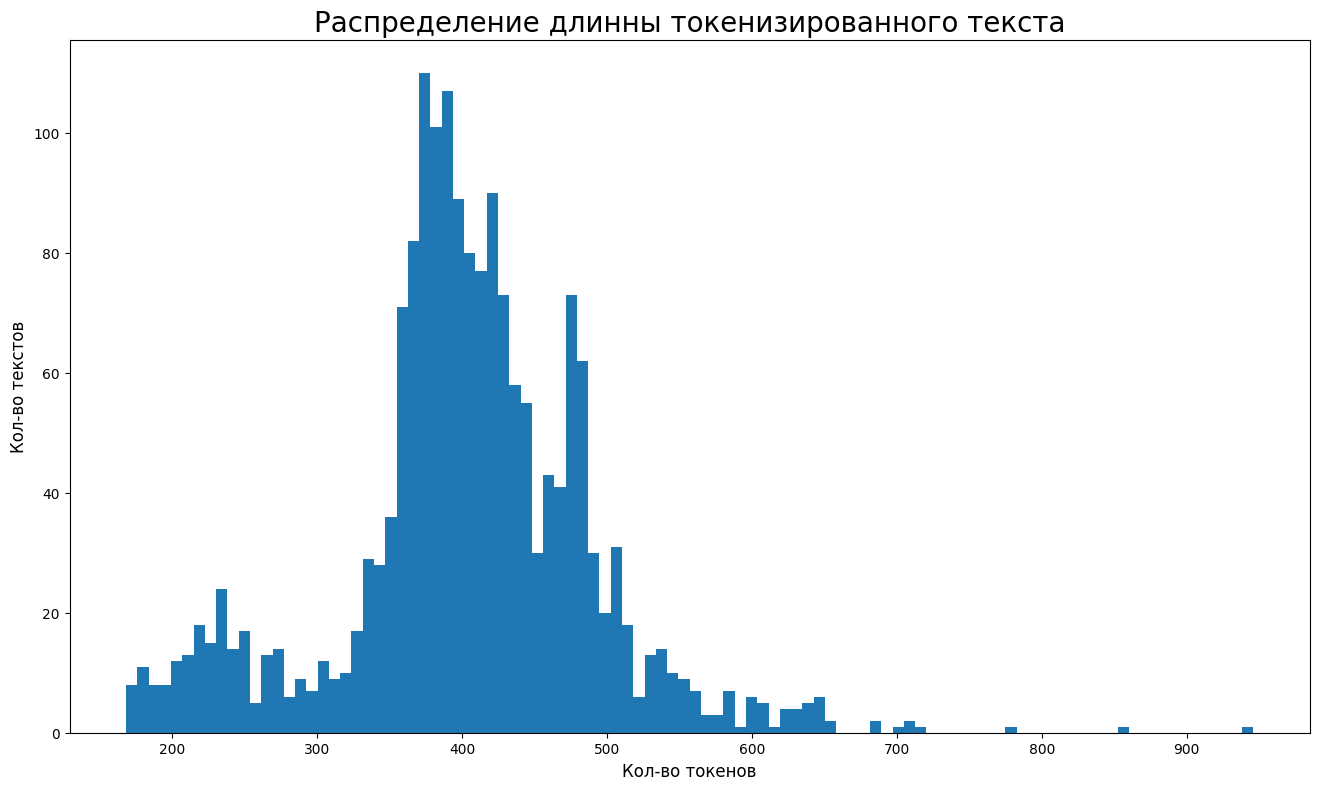

In [88]:
counts, bins = np.histogram(train['trained_tokenizer_text'].apply(len), bins=100)
plt.figure(figsize=(16,9))
plt.stairs(counts, bins, fill=True)
plt.title('Распределение длинны токенизированного текста', fontsize=20)
plt.xlabel('Кол-во токенов', fontsize=12)
plt.ylabel('Кол-во текстов', fontsize=12)
plt.show()

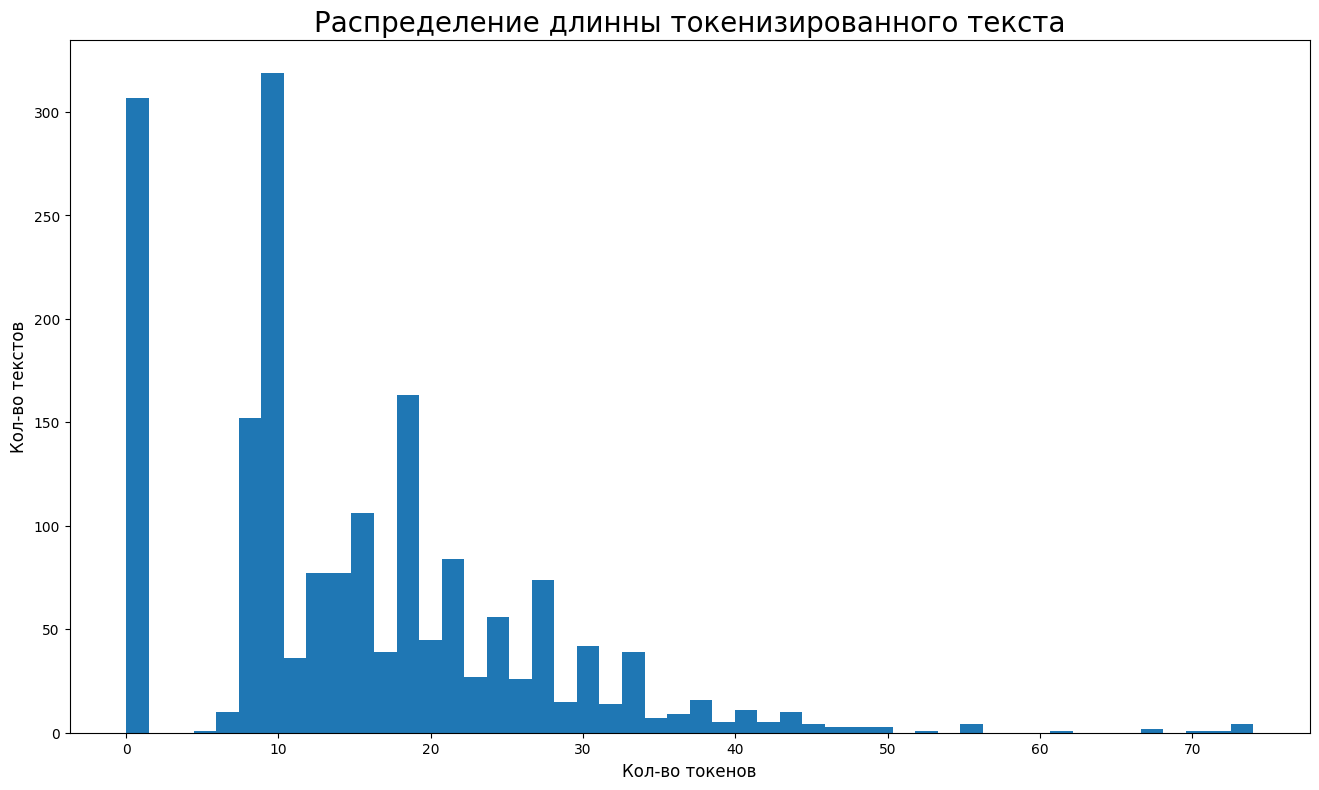

In [89]:
counts, bins = np.histogram(train['trained_tokenizer_extracted_text'].apply(len), bins=50)
plt.figure(figsize=(16,9))
plt.stairs(counts, bins, fill=True)
plt.title('Распределение длинны токенизированного текста', fontsize=20)
plt.xlabel('Кол-во токенов', fontsize=12)
plt.ylabel('Кол-во текстов', fontsize=12)
plt.show()

Также заметим, что кол-во токенов непустых ответов начинается примерно от 5. Это информация будет полезна в будущем.